# Time to do some importing

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

c:\Users\ukpsa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\ukpsa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\ukpsa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
np.random.seed(0) # set a seed for reproducibility
pd.Series(np.random.rand(5), name='random_numbers')

0    0.548814
1    0.715189
2    0.602763
3    0.544883
4    0.423655
Name: random_numbers, dtype: float64

A Series object in pandas has one column, that column is after the indices. <br>
A DataFrame in pandas has multiple columns, which basically represents a spreadsheet of data.

In [3]:
np.random.seed(0) # set seed so result is reproducible
pd.DataFrame(
 {
    'random': np.random.rand(5),
    'text': ['hot', 'warm', 'cool', 'cold', None],
    'truth': [np.random.choice([True, False])
        for _ in range(5)]
},
    index=pd.date_range(
        end=dt.date(2019, 4, 21),
        freq='1D', periods=5, name='date'
    )
 )

,random,text,truth
date,,,
2019-04-17,0.548814,hot,False
2019-04-18,0.715189,warm,True
2019-04-19,0.602763,cool,True
2019-04-20,0.544883,cold,False
2019-04-21,0.423655,None,True


In [4]:
list_of_tuples = [(n, n**2, n**3) for n in range(5)]
pd.DataFrame(
    list_of_tuples,
    columns=['n', 'n_squared', 'n_cubed']
) # making a Dataframe out of a lits of tuples, not sure how this is useful but it's cool

,n,n_squared,n_cubed
0,0,0,0
1,1,1,1
2,2,4,8
3,3,9,27
4,4,16,64


In [5]:
pd.DataFrame(
    np.array([
        [0, 0, 0],
        [1, 1, 1],
        [2, 4, 8],
        [3, 9, 27],
        [4, 16, 64]
        ]), columns=['n', 'n_squared', 'n_cubed']
) # creating a DataFrame out of a numpy array

,n,n_squared,n_cubed
0,0,0,0
1,1,1,1
2,2,4,8
3,3,9,27
4,4,16,64


In [6]:
with open(r'C:\Users\ukpsa\Downloads\Hands-On-Data-Analysis-with-Pandas-2nd-edition-master\ch_02\data\earthquakes.csv', 'r') as f:
    first_line = f.readline().strip()
    if first_line.startswith('header1,header2,header3'):
        headers = first_line.split(',')
        print(headers)
    else:
        print('File does not have headers.')

File does not have headers.


In [7]:
n = 2
with open('data/earthquakes.csv', 'r') as file:
    for _ in range(n):
        print(file.readline(), end='\r')

alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz,updated,url
,,37389218,https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=ci37389218&format=geojson,0.008693,,85.0,",ci37389218,",1.35,ml,,ci,26.0,"9km NE of Aguanga, CA",0.19,28,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475395144,https://earthquake.usgs.gov/earthquakes/eventpage/ci37389218


In [8]:
!find /c /v "" data\earthquakes.csv


---------- DATA\EARTHQUAKES.CSV: 9333


In [9]:
with open('data/earthquakes.csv', 'r') as f:
    first_line = f.readline().strip()
    column_count = first_line.count(',') + 1
print(column_count)

26


In [10]:
df = pd.read_csv('data/earthquakes.csv')

In [11]:
import sqlite3
with sqlite3.connect('data/quakes.db') as connection:
    pd.read_csv('data/tsunamis.csv').to_sql(
    'tsunamis', connection, index=False,
    if_exists='replace'
)

In [12]:
with sqlite3.connect('data/quakes.db') as connection:
    tsunamis = \
    pd.read_sql('SELECT * FROM tsunamis', connection)
tsunamis.head()

,alert,type,title,place,magType,mag,time
0,None,earthquake,"M 5.0 - 165km NNW of Flying Fish Cove, Christm...","165km NNW of Flying Fish Cove, Christmas Island",mww,5.0,1539459504090
1,green,earthquake,"M 6.7 - 262km NW of Ozernovskiy, Russia","262km NW of Ozernovskiy, Russia",mww,6.7,1539429023560
2,green,earthquake,"M 5.6 - 128km SE of Kimbe, Papua New Guinea","128km SE of Kimbe, Papua New Guinea",mww,5.6,1539312723620
3,green,earthquake,"M 6.5 - 148km S of Severo-Kuril'sk, Russia","148km S of Severo-Kuril'sk, Russia",mww,6.5,1539213362130
4,green,earthquake,"M 6.2 - 94km SW of Kokopo, Papua New Guinea","94km SW of Kokopo, Papua New Guinea",mww,6.2,1539208835130


In [13]:
import requests

In [14]:
yesterday = dt.date.today() - dt.timedelta(days=1)
api = 'https://earthquake.usgs.gov/fdsnws/event/1/query'
payload = {
    'format': 'geojson',
    'starttime': yesterday - dt.timedelta(days=30),
    'endtime': yesterday
}
response = requests.get(api, params=payload)

In [15]:
response.status_code

200

I asked ChatGPT for what 200 means and it gave me the whole list of status codes<br>
200: OK - The request was successful<br>
400: Bad Request - The request was malformed or invalid<br>
401: Unauthorized - The request requires authentication or authorization<br>
403: Forbidden - The request is not allowed<br>
404: Not Found - The requested resource was not found<br>
500: Internal Server Error - The server encountered an error while processing the request<br>

# This is to document my learnings 
Come back later

In [16]:
earthquake_json = response.json()
type(earthquake_json['features'])



list

In [17]:
earthquake_json['features'][0]

{'type': 'Feature',
 'properties': {'mag': 1.07,
  'place': '99 km W of Adak, Alaska',
  'time': 1678838396940,
  'updated': 1678846967330,
  'tz': None,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/av91805791',
  'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=av91805791&format=geojson',
  'felt': None,
  'cdi': None,
  'mmi': None,
  'alert': None,
  'status': 'reviewed',
  'tsunami': 0,
  'sig': 18,
  'net': 'av',
  'code': '91805791',
  'ids': ',av91805791,',
  'sources': ',av,',
  'types': ',origin,phase-data,',
  'nst': 4,
  'dmin': None,
  'rms': 0.16,
  'gap': 207,
  'magType': 'ml',
  'type': 'earthquake',
  'title': 'M 1.1 - 99 km W of Adak, Alaska'},
 'geometry': {'type': 'Point', 'coordinates': [-178.0835, 51.857, 3.62]},
 'id': 'av91805791'}

In [18]:
data_earthquake_properties = [x['properties'] for x in earthquake_json['features']] # making properties dict to become a list
df = pd.DataFrame(data_earthquake_properties)

In [19]:
df.shape

(12323, 26)

In [20]:
df.columns

Index(['mag', 'place', 'time', 'updated', 'tz', 'url', 'detail', 'felt', 'cdi',
       'mmi', 'alert', 'status', 'tsunami', 'sig', 'net', 'code', 'ids',
       'sources', 'types', 'nst', 'dmin', 'rms', 'gap', 'magType', 'type',
       'title'],
      dtype='object')

In [21]:
df.head()

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,ids,sources,types,nst,dmin,rms,gap,magType,type,title
0,1.07,"99 km W of Adak, Alaska",1678838396940,1678846967330,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",av91805791,",",av,",",origin,phase-data,",4.0,NaN,0.16,207.0,ml,earthquake,"M 1.1 - 99 km W of Adak, Alaska"
1,1.25,"90 km W of Adak, Alaska",1678838360840,1678840931640,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",av91805786,",",av,",",origin,phase-data,",5.0,NaN,0.12,181.0,ml,earthquake,"M 1.3 - 90 km W of Adak, Alaska"
2,1.57,"89 km W of Adak, Alaska",1678838349120,1678841082540,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",av91094268,",",av,",",origin,phase-data,",5.0,NaN,0.24,201.0,ml,earthquake,"M 1.6 - 89 km W of Adak, Alaska"
3,1.30,"35 km SE of Fox River, Alaska",1678838229941,1678842971729,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ak0233d49eoh,",",ak,",",origin,phase-data,",NaN,NaN,0.28,NaN,ml,earthquake,"M 1.3 - 35 km SE of Fox River, Alaska"
4,2.69,"8km W of Willow Creek, CA",1678837664230,1678839911279,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",nc73856980,",",nc,",",nearby-cities,origin,phase-data,scitech-link,",11.0,0.05501,0.08,148.0,md,earthquake,"M 2.7 - 8km W of Willow Creek, CA"


In [22]:
import os
from flask import Flask, send_file
# Save the data to a CSV file
filename = 'earthquake_data.csv'
df.to_csv(filename, index=False)

# Download the CSV file to your local system


In [23]:
# app = Flask(__name__)
# @app.route('/download')
# def download():
#     filepath = os.path.join(os.getcwd(), filename)
#     return send_file(filepath, as_attachment=True)

# if __name__ == '__main__':
#     app.run()

In [24]:
df.tail(2)

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,ids,sources,types,nst,dmin,rms,gap,magType,type,title
12321,1.50,"14 km ENE of Fox, Alaska",1676246880515,1677103148071,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ak02320rozjd,",",ak,",",origin,phase-data,",NaN,NaN,0.53,NaN,ml,explosion,"M 1.5 Explosion - 14 km ENE of Fox, Alaska"
12322,1.06,"8km NW of The Geysers, CA",1676246603240,1676595733753,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",nc73845521,",",nc,",",focal-mechanism,nearby-cities,origin,phase-da...",31.0,0.01207,0.03,49.0,md,earthquake,"M 1.1 - 8km NW of The Geysers, CA"


In [25]:
df.dtypes

mag        float64
place       object
time         int64
updated      int64
tz          object
url         object
detail      object
felt       float64
cdi        float64
mmi        float64
alert       object
status      object
tsunami      int64
sig          int64
net         object
code        object
ids         object
sources     object
types       object
nst        float64
dmin       float64
rms        float64
gap        float64
magType     object
type        object
title       object
dtype: object

In [26]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12323 entries, 0 to 12322
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mag      12323 non-null  float64
 1   place    12056 non-null  object 
 2   time     12323 non-null  int64  
 3   updated  12323 non-null  int64  
 4   tz       0 non-null      object 
 5   url      12323 non-null  object 
 6   detail   12323 non-null  object 
 7   felt     596 non-null    float64
 8   cdi      596 non-null    float64
 9   mmi      138 non-null    float64
 10  alert    63 non-null     object 
 11  status   12323 non-null  object 
 12  tsunami  12323 non-null  int64  
 13  sig      12323 non-null  int64  
 14  net      12323 non-null  object 
 15  code     12323 non-null  object 
 16  ids      12323 non-null  object 
 17  sources  12323 non-null  object 
 18  types    12323 non-null  object 
 19  nst      8884 non-null   float64
 20  dmin     5775 non-null   float64
 21  rms      123

In [27]:
df.describe()

,mag,time,updated,felt,cdi,mmi,tsunami,sig,nst,dmin,rms,gap
count,12323.000000,1.232300e+04,1.232300e+04,596.000000,596.000000,138.000000,12323.000000,12323.000000,8884.000000,5775.000000,12323.000000,8882.000000
mean,1.588665,1.677583e+12,1.677931e+12,13.679530,2.731879,3.514913,0.001136,61.444778,19.670982,0.620488,0.304667,131.724703
std,1.205202,7.569025e+08,7.183547e+08,73.854886,1.445418,1.579111,0.033688,93.073982,22.429630,1.981483,0.274270,67.418898
min,-1.330000,1.676247e+12,1.676252e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,0.890000,1.676908e+12,1.677457e+12,1.000000,2.000000,2.808250,0.000000,12.000000,6.000000,0.014035,0.090000,77.000000
50%,1.380000,1.677610e+12,1.677953e+12,1.500000,2.500000,3.484500,0.000000,29.000000,12.000000,0.055567,0.190000,120.000000
75%,2.000000,1.678288e+12,1.678529e+12,5.000000,3.400000,4.411750,0.000000,62.000000,25.000000,0.238600,0.500000,177.000000
max,6.900000,1.678838e+12,1.679004e+12,1447.000000,9.100000,8.363000,1.000000,2494.000000,345.000000,33.976000,1.700000,349.000000


In [28]:
df.alert.unique()

array([None, 'green', 'red'], dtype=object)

In [29]:
df.alert.value_counts()

green    62
red       1
Name: alert, dtype: int64

In [30]:
df.alert.mode()

0    green
Name: alert, dtype: object

In [31]:
df.sources.unique()

array([',av,', ',ak,', ',nc,', ',us,', ',ak,us,', ',av,us,', ',us,pr,',
       ',tx,us,', ',uu,', ',pr,', ',nc,nn,', ',hv,', ',ok,', ',uw,',
       ',us,tx,', ',us,usauto,pt,', ',nc,us,', ',ci,', ',nc,nn,us,',
       ',nn,', ',av,ak,', ',us,usauto,', ',ci,us,', ',nn,us,', ',nm,',
       ',tx,', ',nn,nc,', ',us,ak,', ',av,us,ak,', ',us,usauto,at,pt,',
       ',us,hv,', ',usauto,us,', ',us,uu,', ',ak,av,', ',at,us,',
       ',us,pt,', ',pr,us,', ',usauto,pt,us,', ',av,ak,ak,', ',hv,us,',
       ',av,ak,us,', ',av,av,us,', ',se,', ',us,nc,', ',av,av,ak,',
       ',us,ok,', ',ak,us,ak,', ',us,nn,', ',us,uw,', ',at,us,ak,',
       ',uu,us,', ',ew,nc,us,', ',us,pt,at,usauto,', ',us,pr,pt,',
       ',nc,uw,', ',at,us,pt,usauto,', ',nn,uw,', ',pt,us,', ',uw,us,',
       ',ak,at,us,', ',us,nm,', ',ak,ak,us,', ',uw,nn,', ',ok,us,',
       ',av,ak,us,ak,', ',at,pt,us,usauto,', ',us,usauto,pt,at,',
       ',us,av,ak,', ',ak,at,usauto,pt,us,', ',nn,uu,', ',se,us,',
       ',ak,av,us,', ',us,at,usau

In [32]:
import matplotlib.pyplot as plt # I suddenly wanted to try plotting against two Series in the DataFrame

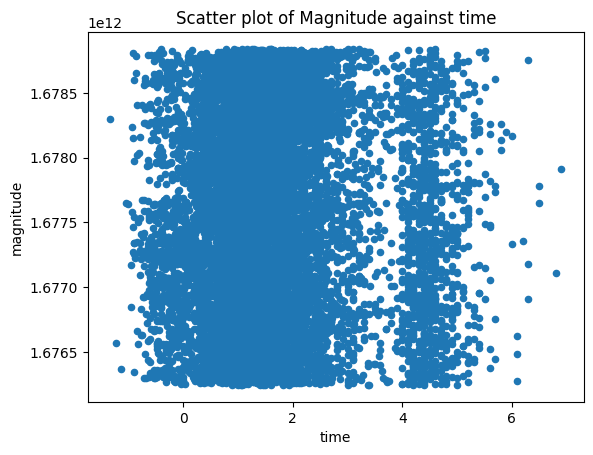

In [33]:
df.plot.scatter(x = 'mag', y = 'time')
plt.xlabel('time')
plt.ylabel('magnitude')
plt.title('Scatter plot of Magnitude against time')
plt.show() # The graph doesn't really tell me anything but it's cool

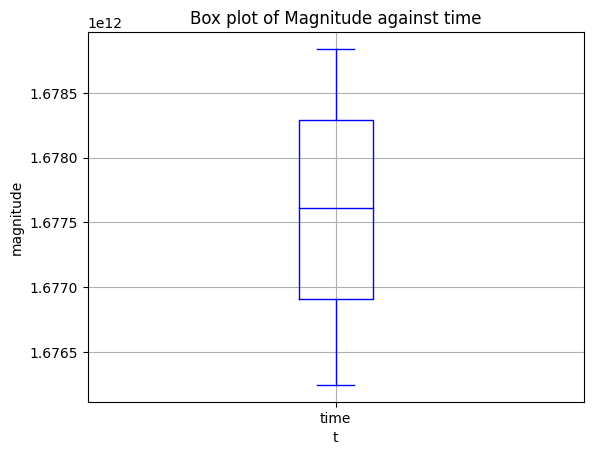

In [53]:
# Create the box plot
df.plot.box(x='mag', y='time', color='blue')

plt.xlabel('x')
plt.ylabel('magnitude')
plt.grid(True)
plt.title('A box plot of Magnitude against time')
plt.show() # this box plot is even more confusing


# Box plots 
Ah a box plot. I was first confused about it so I went on a reading spree on what a box plot aims to achieve. Here's what I learnt
1) Box plots show the <b>quartiles</b> of a graph and the outliers (I will get to this)<br>
2) The lines that resemble a T are the <b>whiskers</b>, they represent from the <b>min value</b> to the first quartile(25th <b>percentile</b>) and the 3rd quartile<br>(75th percentile) to the <b>max value</b>.<br><br>
3) The 1st quartile to the 3rd quartile represent the <b>box</b> and the line in the box is the <strong>median</strong>.
4) The entire box is the <b>interquartile range</b>.
5) When the median line is in the middle, we can say the values are evenly distributed also known as a <strong>normal distribution.</strong><br><br>
6) When the median isn't in the middle the box plot becomes assymetrical, this is known as <b>skewness</b>.
7) When the median is closer to the 1st quartile, this is called a negative skew. In a negative skew, the data is concentrated towards<br> the lower part of the plot so the median is a better measure of the central tendency of the data.
8) When the median is closer to the 3rd quartile, this is called a positive skew, the data is concentrated towards the higher part of the plot.<br><br>
9) Skewness in data usually has to be solved before moving forward.
10) <strong>Outliers</strong> are values outside the whiskers, they are either removed or undergo some other statistical processes. They are typically defined by 1.5 times the interquartile range.

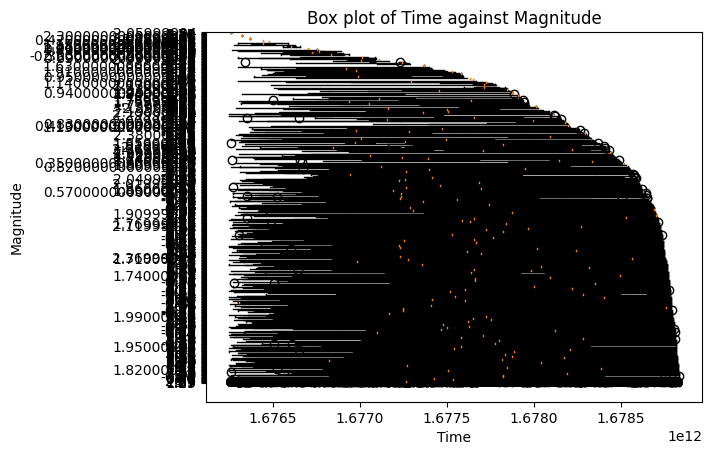

In [54]:
grouped_data = [df.loc[df['mag'] == mag, 'time'] for mag in df['mag'].unique()]

# Create a figure with a single axis
fig, ax = plt.subplots()

# Create the box plot
ax.boxplot(grouped_data, labels=df['mag'].unique(), vert=False, patch_artist=True)

# Add the scatter plot
ax.scatter(df['time'], df['mag'], s=10, color='black')

# Add labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Magnitude')
ax.set_title('Box plot of Time against Magnitude')

# Show the plot
plt.show()

I don't know what happened here, the plan was to draw the scatter plot of the graph alongside the box plot and I asked ChatGPT what to do, it gave me this horror beyond my wildest dreams. I like it tho so I will keep it

In [56]:
df[['mag','time']][100:111]

,mag,time
100,1.40,1678811607629
101,1.70,1678811510482
102,1.40,1678811277697
103,1.25,1678811118490
104,1.00,1678810895256
105,1.68,1678810656990
106,1.36,1678809881700
107,3.22,1678809881560
108,-0.92,1678809866230
109,0.11,1678809650860


In [57]:
df[110:121]['title'] = df[110:121]['title'].str.lower()

C:\Users\ukpsa\AppData\Local\Temp\ipykernel_11144\2916346428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[110:121]['title'] = df[110:121]['title'].str.lower()
